In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from dotenv import load_dotenv


In [2]:
load_dotenv()
# Set the path to the folders containing the images
# train_dir = './training_data/'
train_dir = os.environ.get('TRAINING_DIRECTORY')

# Define the image size
img_height = 512
img_width = 512

# Define the batch size
batch_size = 32


In [3]:
# Create a training dataset from the images in the training folder
(train_ds, validation_ds) = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset="both",
    seed=123,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Print the number of batches in the training and validation datasets
print("Number of batches in training dataset: %d" %
      tf.data.experimental.cardinality(train_ds))
print("Number of batches in validation dataset: %d" %
      tf.data.experimental.cardinality(validation_ds))


Found 2043 files belonging to 2 classes.
Using 1635 files for training.
Using 408 files for validation.
Number of batches in training dataset: 52
Number of batches in validation dataset: 13


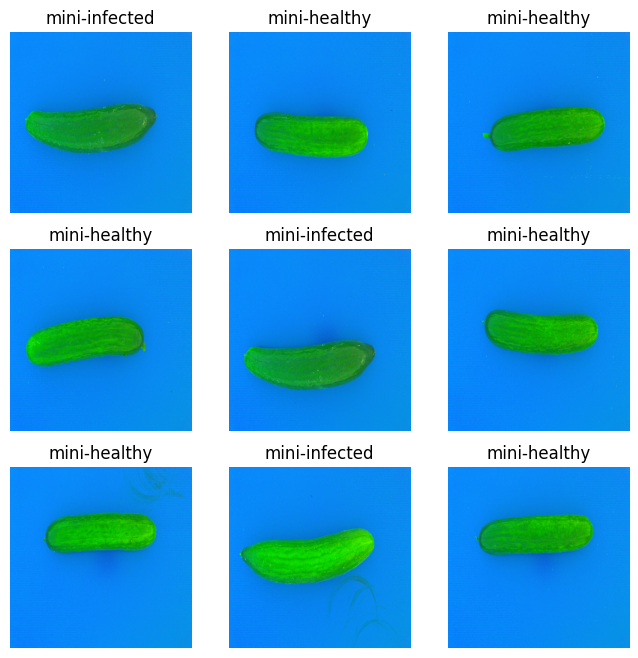

In [16]:
classes = train_ds.class_names

# Plot some images with their labels
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')


In [7]:
# Create the model
model = keras.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(
        1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    # keras.layers.Conv2D(128, 3, activation='relu'),
    # keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Fit the model to the training dataset
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    batch_size=batch_size,
    epochs=10
)


Epoch 1/10
52/52 [==============================] - 26s 385ms/step - loss: 8.0987 - accuracy: 0.5804 - val_loss: 0.5323 - val_accuracy: 0.7328
Epoch 2/10
52/52 [==============================] - 22s 380ms/step - loss: 0.4615 - accuracy: 0.7927 - val_loss: 0.5012 - val_accuracy: 0.7353
Epoch 3/10
52/52 [==============================] - 22s 363ms/step - loss: 0.3639 - accuracy: 0.8300 - val_loss: 0.3838 - val_accuracy: 0.8235
Epoch 4/10
52/52 [==============================] - 22s 369ms/step - loss: 0.3845 - accuracy: 0.8324 - val_loss: 0.4797 - val_accuracy: 0.7623
Epoch 5/10
52/52 [==============================] - 21s 364ms/step - loss: 0.3511 - accuracy: 0.8391 - val_loss: 0.4627 - val_accuracy: 0.7843
Epoch 6/10
52/52 [==============================] - 22s 365ms/step - loss: 0.3379 - accuracy: 0.8453 - val_loss: 0.4587 - val_accuracy: 0.7892
Epoch 7/10
52/52 [==============================] - 21s 356ms/step - loss: 0.2751 - accuracy: 0.8752 - val_loss: 0.3772 - val_accuracy: 0.8284

In [8]:
def prediction_to_class(p, classes):
    for (i, x) in enumerate(classes):
        if p < (i+1) * (1 / len(classes)):
            return x;
    return classes[-1]

In [13]:
test_img_healthy_path = f'{train_dir}/mini-healthy/1.jpg'
test_img_infected_path = f'{train_dir}/mini-infected/1.jpg'

# Load a new image
image_healthy = tf.keras.preprocessing.image.load_img(
    test_img_healthy_path, target_size=(img_height, img_width))

image_infected = tf.keras.preprocessing.image.load_img(
    test_img_infected_path, target_size=(img_height, img_width))


# Preprocess the image
image_healthy = tf.keras.preprocessing.image.img_to_array(image_healthy)
image_healthy = tf.expand_dims(image_healthy, axis=0)

image_infected = tf.keras.preprocessing.image.img_to_array(image_infected)
image_infected = tf.expand_dims(image_infected, axis=0)

# Make a prediction with the model
print(prediction_to_class(model.predict(image_healthy), classes))
print(prediction_to_class(model.predict(image_infected), classes))


1/1 [==============================] - 0s 18ms/step
mini-healthy
1/1 [==============================] - 0s 25ms/step
mini-infected
